# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Loading all needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#Gathering first part of dataset
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#importing requests
import requests

In [4]:
#Gathering second part of dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

#Reading url data into a pandas dataframe
image_df= pd.read_csv('image-predictions.tsv', sep ='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#Gathering third part of data. 
#Importing necessary packages.

import tweepy
import configparser
import json
from timeit import default_timer as timer

In [65]:
#For reading essential keys saved in a configuration file.
config= configparser.ConfigParser()
config.read("Twitterapi keys.ini")

api_key = config['twitter']['API Key']
api_key_secret = config['twitter']['API Key secret']

access_token = config['twitter']['Access token']
access_token_secret = config['twitter']['Access token secret']

#Authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode= "extended")
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
        except tweepy.NotFound as f:
            print("Not Found")
            fails_dict[tweet_id] = e + f
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Rate limit reached. Sleeping for: 131


Success
347: 831926988323639298
Success
348: 831911600680497154
Success
349: 831670449226514432
Success
350: 831650051525054464
Success
351: 831552930092285952
Success
352: 831322785565769729
Success
353: 831315979191906304
Success
354: 831309418084069378
Success
355: 831262627380748289
Success
356: 830956169170665475
Success
357: 830583320585068544
Success
358: 830173239259324417
Success
359: 830097400375152640
Success
360: 829878982036299777
Success
361: 829861396166877184
Success
362: 829501995190984704
Success
363: 829449946868879360
Success
364: 829374341691346946
Fail
365: 829141528400556032
Success
366: 829011960981237760
Success
367: 828801551087042563
Success
368: 828770345708580865
Success
369: 828708714936930305
Success
370: 828650029636317184
Success
371: 828409743546925057
Success
372: 828408677031882754
Success
373: 828381636999917570
Success
374: 828376505180889089
Success
375: 828372645993398273
Success
376: 828361771580813312
Success
377: 828046555563323392
Success
378

Success
604: 798628517273620480
Success
605: 798585098161549313
Success
606: 798576900688019456
Success
607: 798340744599797760
Success
608: 798209839306514432
Success
609: 797971864723324932
Success
610: 797545162159308800
Success
611: 797236660651966464
Success
612: 797165961484890113
Success
613: 796904159865868288
Success
614: 796865951799083009
Success
615: 796759840936919040
Success
616: 796563435802726400
Success
617: 796484825502875648
Success
618: 796387464403357696
Success
619: 796177847564038144
Success
620: 796149749086875649
Success
621: 796125600683540480
Success
622: 796116448414461957
Success
623: 796080075804475393
Success
624: 796031486298386433
Success
625: 795464331001561088
Success
626: 795400264262053889
Success
627: 795076730285391872
Success
628: 794983741416415232
Success
629: 794926597468000259
Success
630: 794355576146903043
Success
631: 794332329137291264
Success
632: 794205286408003585
Success
633: 793962221541933056
Success
634: 793845145112371200
Success


Success
861: 763167063695355904
Success
862: 763103485927849985
Success
863: 762699858130116608
Success
864: 762471784394268675
Success
865: 762464539388485633
Success
866: 762316489655476224
Success
867: 762035686371364864
Success
868: 761976711479193600
Success
869: 761750502866649088
Success
870: 761745352076779520
Success
871: 761672994376806400
Success
872: 761599872357261312
Success
873: 761371037149827077
Success
874: 761334018830917632
Success
875: 761292947749015552
Success
876: 761227390836215808
Success
877: 761004547850530816
Success
878: 760893934457552897
Success
879: 760656994973933572
Success
880: 760641137271070720
Success
881: 760539183865880579
Success
882: 760521673607086080
Success
883: 760290219849637889
Success
884: 760252756032651264
Success
885: 760190180481531904
Success
886: 760153949710192640
Success
887: 759943073749200896
Success
888: 759923798737051648
Fail
889: 759846353224826880
Success
890: 759793422261743616
Success
891: 759566828574212096
Fail
892: 7

Success
1114: 733109485275860992
Success
1115: 732732193018155009
Success
1116: 732726085725589504
Success
1117: 732585889486888962
Success
1118: 732375214819057664
Success
1119: 732005617171337216
Success
1120: 731285275100512256
Success
1121: 731156023742988288
Success
1122: 730924654643314689
Success
1123: 730573383004487680
Success
1124: 730427201120833536
Success
1125: 730211855403241472
Success
1126: 730196704625098752
Success
1127: 729854734790754305
Success
1128: 729838605770891264
Success
1129: 729823566028484608
Success
1130: 729463711119904772
Success
1131: 729113531270991872
Success
1132: 728986383096946689
Success
1133: 728760639972315136
Success
1134: 728751179681943552
Success
1135: 728653952833728512
Success
1136: 728409960103686147
Success
1137: 728387165835677696
Success
1138: 728046963732717569
Success
1139: 728035342121635841
Success
1140: 728015554473250816
Success
1141: 727685679342333952
Success
1142: 727644517743104000
Success
1143: 727524757080539137
Success
11

Rate limit reached. Sleeping for: 359


Success
1247: 711694788429553666
Success
1248: 711652651650457602
Success
1249: 711363825979756544
Success
1250: 711306686208872448
Success
1251: 711008018775851008
Success
1252: 710997087345876993
Success
1253: 710844581445812225
Success
1254: 710833117892898816
Success
1255: 710658690886586372
Success
1256: 710609963652087808
Success
1257: 710588934686908417
Success
1258: 710296729921429505
Success
1259: 710283270106132480
Success
1260: 710272297844797440
Success
1261: 710269109699739648
Success
1262: 710153181850935296
Success
1263: 710140971284037632
Success
1264: 710117014656950272
Success
1265: 709918798883774466
Success
1266: 709901256215666688
Success
1267: 709852847387627521
Success
1268: 709566166965075968
Success
1269: 709556954897764353
Success
1270: 709519240576036864
Success
1271: 709449600415961088
Success
1272: 709409458133323776
Success
1273: 709225125749587968
Success
1274: 709207347839836162
Success
1275: 709198395643068416
Success
1276: 709179584944730112
Success
12

Success
1496: 692535307825213440
Success
1497: 692530551048294401
Success
1498: 692423280028966913
Success
1499: 692417313023332352
Success
1500: 692187005137076224
Success
1501: 692158366030913536
Success
1502: 692142790915014657
Success
1503: 692041934689402880
Success
1504: 692017291282812928
Success
1505: 691820333922455552
Success
1506: 691793053716221953
Success
1507: 691756958957883396
Success
1508: 691675652215414786
Success
1509: 691483041324204033
Success
1510: 691459709405118465
Success
1511: 691444869282295808
Success
1512: 691416866452082688
Success
1513: 691321916024623104
Success
1514: 691096613310316544
Success
1515: 691090071332753408
Success
1516: 690989312272396288
Success
1517: 690959652130045952
Success
1518: 690938899477221376
Success
1519: 690932576555528194
Success
1520: 690735892932222976
Success
1521: 690728923253055490
Success
1522: 690690673629138944
Success
1523: 690649993829576704
Success
1524: 690607260360429569
Success
1525: 690597161306841088
Success
15

Success
1745: 679158373988876288
Success
1746: 679148763231985668
Success
1747: 679132435750195208
Success
1748: 679111216690831360
Success
1749: 679062614270468097
Success
1750: 679047485189439488
Success
1751: 679001094530465792
Success
1752: 678991772295516161
Success
1753: 678969228704284672
Success
1754: 678800283649069056
Success
1755: 678798276842360832
Success
1756: 678774928607469569
Success
1757: 678767140346941444
Success
1758: 678764513869611008
Success
1759: 678755239630127104
Success
1760: 678740035362037760
Success
1761: 678708137298427904
Success
1762: 678675843183484930
Success
1763: 678643457146150913
Success
1764: 678446151570427904
Success
1765: 678424312106393600
Success
1766: 678410210315247616
Success
1767: 678399652199309312
Success
1768: 678396796259975168
Success
1769: 678389028614488064
Success
1770: 678380236862578688
Success
1771: 678341075375947776
Success
1772: 678334497360859136
Success
1773: 678278586130948096
Success
1774: 678255464182861824
Success
17

Success
1994: 672609152938721280
Success
1995: 672604026190569472
Success
1996: 672594978741354496
Success
1997: 672591762242805761
Success
1998: 672591271085670400
Success
1999: 672538107540070400
Success
2000: 672523490734551040
Success
2001: 672488522314567680
Success
2002: 672482722825261057
Success
2003: 672481316919734272
Success
2004: 672475084225949696
Success
2005: 672466075045466113
Success
2006: 672272411274932228
Success
2007: 672267570918129665
Success
2008: 672264251789176834
Success
2009: 672256522047614977
Success
2010: 672254177670729728
Success
2011: 672248013293752320
Success
2012: 672245253877968896
Success
2013: 672239279297454080
Success
2014: 672231046314901505
Success
2015: 672222792075620352
Success
2016: 672205392827572224
Success
2017: 672169685991993344
Success
2018: 672160042234327040
Success
2019: 672139350159835138
Success
2020: 672125275208069120
Success
2021: 672095186491711488
Success
2022: 672082170312290304
Success
2023: 672068090318987265
Success
20

Rate limit reached. Sleeping for: 297


Success
2147: 669923323644657664
Success
2148: 669753178989142016
Success
2149: 669749430875258880
Success
2150: 669684865554620416
Success
2151: 669683899023405056
Success
2152: 669682095984410625
Success
2153: 669680153564442624
Success
2154: 669661792646373376
Success
2155: 669625907762618368
Success
2156: 669603084620980224
Success
2157: 669597912108789760
Success
2158: 669583744538451968
Success
2159: 669573570759163904
Success
2160: 669571471778410496
Success
2161: 669567591774625800
Success
2162: 669564461267722241
Success
2163: 669393256313184256
Success
2164: 669375718304980992
Success
2165: 669371483794317312
Success
2166: 669367896104181761
Success
2167: 669363888236994561
Success
2168: 669359674819481600
Success
2169: 669354382627049472
Success
2170: 669353438988365824
Success
2171: 669351434509529089
Success
2172: 669328503091937280
Success
2173: 669327207240699904
Success
2174: 669324657376567296
Success
2175: 669216679721873412
Success
2176: 669214165781868544
Success
21

In [66]:
with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        line = json.loads(line)
        print(line)
        break

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [67]:
#Reading tweet_json.txt into a pandas dataframe.
#Third part of dataset.
df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        line = json.loads(line)

        tweet_id = line['id']
        retweet_count = line['retweet_count']
        favorite_count = line['favorite_count']

        df_list.append({'tweet_id':tweet_id,
                       'retweet_count':retweet_count,
                        'favorite_count':favorite_count})

tweet_df = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessment to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [68]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [69]:
archive_df.info()

archive_df.sample(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking scene. A father taking care of hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675888385...,10,10,None,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
1387,700505138482569216,NaN,NaN,2016-02-19 02:20:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaia. She's just cute as hell. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700505138...,12,10,Kaia,None,None,None,None
1035,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,None,None,None,puppo
751,779056095788752897,NaN,NaN,2016-09-22 20:33:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody drop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None
764,777953400541634568,NaN,NaN,2016-09-19 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Gerald. He's a fairly exot...,7.681934e+17,4.196984e+09,2016-08-23 21:09:14 +0000,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
404,824025158776213504,NaN,NaN,2017-01-24 22:44:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I wish we were dogs"" 14/10 for @BadlandsNPS h...",NaN,NaN,NaN,https://twitter.com/badlandsnps/status/8239662...,14,10,None,None,None,None,None


In [70]:
archive_df.notnull().sum()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [71]:
archive_df.loc[archive_df['name'] == 'None']
print(len(archive_df.loc[archive_df['name'] == 'None']))

745


In [72]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [73]:
archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [74]:
archive_df['tweet_id'].duplicated().sum()

0

In [75]:
archive_df.isnull().sum()/(len(archive_df)) * 100

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [76]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [77]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [78]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [79]:
print(image_df['p1_dog'].value_counts())

print(image_df['p2_dog'].value_counts())

print(image_df['p3_dog'].value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [80]:
image_df['tweet_id'].duplicated().sum()

0

In [81]:
image_df['img_num'].max()

4

In [82]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [83]:
image_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [84]:
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33808
1,892177421306343426,5301,29330
2,891815181378084864,3481,22052
3,891689557279858688,7225,36939
4,891327558926688256,7760,35309
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [85]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [86]:
tweet_df.duplicated().sum()

0

### Quality issues
#### *Twitter Archived Dataset*
1. Incorrect data type for the timestamp column (object instead of datetime)

2. Certain tweets have retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

3. Missing values in expanded_url column.

4. Numerous missing values (over 80%) in the in_reply_status_id, in_reply_user_id, retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp columns.

5. Zero values in rating_numerator and rating_denominator columns.

6. Name entries such as 'None' and 'a', 'an', 'mad', etc in the name column. All non-dog names entries start with lowercase.

#### *Image Predictions Dataset*
7. Inconsistent entry format in the p1, p2 and p3 columns. Some predictions start with uppercase and others with lowercase.

8. Undescriptive column headers(p1, p2, p3, p1_dog, p1_conf and the other p columns).

### Tidiness issues

1. Different columns for the dog stages instead of one (twitter archive dataset).

2. The three tables should only be one table. Every observational unit should be a table.

## Cleaning Data
In this section, clean **all** the issues you documented while assessing.

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [87]:
# Make copies of original pieces of data
archive_clean = archive_df.copy()
image_clean = image_df.copy()
tweet_clean = tweet_df.copy()

### Issue #1:

Twitter archive dataset: Incorrect data type for the timestamp column(object instead of datetime).

#### Define
Change data type to datetime.

#### Code

In [88]:
# Changing data type in the timestamp column.
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [89]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:
Twitter archive dataset: Certain tweets have retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Define:
Remove the tweets with retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp since they are not essential for the analysis.

#### Code

In [90]:
# Excluding all tweets with retweeted status.
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [91]:
# Confirming that all retweeted status have been removed.
archive_clean.notnull().sum()

tweet_id                      2175
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2175
source                        2175
text                          2175
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2117
rating_numerator              2175
rating_denominator            2175
name                          2175
doggo                         2175
floofer                       2175
pupper                        2175
puppo                         2175
dtype: int64

In [92]:
print(archive_clean.retweeted_status_id.notnull().sum())

0


### Issue #3 and #4:
Twitter archive dataset: Missing values in expanded_url column.
### Issue #4:
Twitter archive dataset: Numerous missing values (over 50%) in the in_reply_status_id, in_reply_user_id, retweeted_status_id,retweeted_status_user_id, and retweeted_status_timestamp columns.

#### Define:
Drop all the listed columns since they are not essential for the analysis.

#### Code

In [93]:
#Dropping all unnecessary columns according to their index.
archive_clean.drop(archive_df.columns[[1, 2, 6, 7, 8, 9]], axis = 1, inplace = True)

#### Test

In [94]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #5:
Twitter archive dataset: Zero values in rating_numerator and rating_denominator columns.

#### Define:
Filter all zero values in the rating numerator and denominator columns from the table.

#### Code

In [95]:
# Removing zero values from both rating columns.
archive_clean = archive_clean[archive_clean['rating_numerator'] != 0 ]
archive_clean = archive_clean[archive_clean['rating_denominator'] != 0 ]

#### Test

In [96]:
archive_clean.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
17        1
60        1
44        1
143       1
80        1
121       1
20        1
26        1
144       1
45        1
165       1
99        1
50        1
204       1
1776      1
27        1
75        1
24        1
84        1
15        1
182       1
666       1
88        1
Name: rating_numerator, dtype: int64

In [97]:
print(len(archive_clean.loc[archive_clean['rating_numerator'] == 0 ]))

0


### Issue #6:
Twitter archive dataset: Name entries such as 'None' and 'a', 'an', 'mad', etc in the name column. All non-dog names entries start with lowercase.

#### Define:
Remove all non-dog names and replace with 'None'.

#### Code

In [98]:
#Extracting all lowercase strings in the twitter archive dataset name column.
non_dogname = []
for i in archive_clean.name:
    if i.islower():
        non_dogname.append(i)
print(non_dogname)

#Replacing all extracted non_names with None
archive_clean['name'].replace(non_dogname,'None', inplace = True)

['such', 'a', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'a', 'very', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


#### Test

In [99]:
print(i)

None


In [100]:
archive_clean.name.value_counts()

None          781
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

In [101]:
archive_clean.sample(30)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1094,736736130620620800,2016-05-29 01:49:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chadrick. He's gnarly af 13/10 https:/...,13,10,Chadrick,None,None,None,None
90,874680097055178752,2017-06-13 17:29:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Cash. He hath acquired a stick. A very go...,12,10,Cash,None,None,None,None
229,848212111729840128,2017-04-01 16:35:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,6,10,Jerry,None,None,None,None
668,790277117346975746,2016-10-23 19:42:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He never backs down from a chal...,11,10,Bruce,None,None,None,None
311,835297930240217089,2017-02-25 01:18:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's a Benebop Cumberplop. Quite rar...,12,10,Ash,None,None,None,None
2108,670452855871037440,2015-11-28 04:03:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This dog can't see its haters. 11/10 https://t...,11,10,None,None,None,None,None
1911,674410619106390016,2015-12-09 02:09:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,10,10,Lenny,None,None,None,None
1485,693155686491000832,2016-01-29 19:36:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dunkin. He can only see when he's wet ...,12,10,Dunkin,None,None,None,None
1930,674038233588723717,2015-12-08 01:30:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaiya. She's an aspiring shoe model. 1...,12,10,Kaiya,None,None,pupper,None
2285,667188689915760640,2015-11-19 03:52:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,10,10,None,None,None,None,None


### Issue #7
image predictions dataset: Inconsistent entry format in the p1, p2 and p3 columns. Some start with uppercase and others with lowercase.

### Define
Transform all entries to make them uniform using lowercase.

#### Code

In [102]:
# Changing entry casing to lowercase
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

#### Test

In [103]:
image_clean[['p1', 'p2', 'p3']].sample(20)

,p1,p2,p3
930,hippopotamus,doormat,sea_lion
34,chesapeake_bay_retriever,chain_saw,power_drill
47,miniature_schnauzer,standard_schnauzer,giant_schnauzer
446,african_crocodile,american_alligator,mink
1514,leonberg,keeshond,pomeranian
1867,labrador_retriever,golden_retriever,great_pyrenees
847,pug,bull_mastiff,pekinese
1169,golden_retriever,labrador_retriever,bluetick
714,white_wolf,dingo,collie
2,german_shepherd,malinois,bloodhound


### Issue #8 :
Image predictions dataset: Undescriptive column headers(img_num, p1, p2, p3, p1_dog, p1_conf and the other p columns)

#### Define:
Rename column headers (p1, p2, p3, p1_dog,...) to descriptive titles.

#### Code

In [104]:
# Renaming non-descriptive column headers.
image_clean.rename(columns = {'p1':'prediction1', 'p1_conf': 'prediction1_conf', 'p1_dog': 'prediction1_dog','p2':'prediction2', 'p2_conf': 'prediction2_conf', 'p2_dog': 'prediction2_dog', 'p3':'prediction3', 'p3_conf': 'prediction3_conf', 'p3_dog': 'prediction3_dog', 'img_num': 'image_num'}, inplace=True)

#### Test

In [105]:
list(image_clean)

['tweet_id',
 'jpg_url',
 'image_num',
 'prediction1',
 'prediction1_conf',
 'prediction1_dog',
 'prediction2',
 'prediction2_conf',
 'prediction2_dog',
 'prediction3',
 'prediction3_conf',
 'prediction3_dog']

## Tidiness Issues

### Issue #1:
Different columns for the dog stage instead of one (twitter archive dataset).


#### Define
Merge the four columns (doggo, floofer, pupper and puppo) to form one under the header, dog_stage.

#### Code

In [106]:
#Replacing None in all columns with empty strings
archive_clean.doggo.replace('None', '', inplace = True)
archive_clean.puppo.replace('None', '', inplace = True)
archive_clean.pupper.replace('None', '', inplace = True)
archive_clean.floofer.replace('None', '', inplace = True)

# Merging columns to one
archive_clean['dog_stage'] = archive_clean.doggo  + archive_clean.puppo + archive_clean.pupper + archive_clean.floofer

# Formatting entries with more than one dog stage.
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [107]:
#Dropping individual columns that were merged
archive_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis = 1, inplace = True)

In [108]:
# Replacing spaces with null in the new dog_stage column.
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('', np.nan)

#### Test

In [109]:
archive_clean.sample(30)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
306,836001077879255040,2017-02-26 23:52:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,13,10,None,NaN
1873,675145476954566656,2015-12-11 02:49:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,9,10,None,NaN
1592,686394059078897668,2016-01-11 03:47:50+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,12,10,None,NaN
873,761334018830917632,2016-08-04 22:52:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,10,10,Bruce,NaN
23,887473957103951883,2017-07-19 00:47:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,13,10,Canela,NaN
2034,671743150407421952,2015-12-01 17:30:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,11,10,None,NaN
1086,738166403467907072,2016-06-02 00:32:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Axel. He's a professional leaf catcher...,12,10,Axel,NaN
2148,669749430875258880,2015-11-26 05:28:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. Clarence thought he saw...,8,10,Clarence,NaN
704,785872687017132033,2016-10-11 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. He appears to be rather h*ckin flu...,12,10,Rusty,NaN
941,752932432744185856,2016-07-12 18:27:35+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Carl. He's very powerful. 12/10 don't ...,12,10,Carl,NaN


In [110]:
archive_clean.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Issue #2:
The three tables should only be one table. They violate the requirement: Every observational unit should be a table.


#### Define
Combine the three tables to form one table.

#### Code

In [111]:
#Merging individual dataset: archive_df, image_df and tweets_df.
master_df= archive_clean.merge(image_clean, on='tweet_id', how='inner').merge(tweet_clean, on = 'tweet_id', how = 'inner')

#### Test

In [112]:
master_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,image_num,...,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7009,33808
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5301,29330
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3481,22052
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7225,36939
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7760,35309


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [113]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

> All insights and visulaizations were generated using the cleaned master dataset(twitter_archive_master.csv).

In [114]:
#importing dataset for insights and visualizations.
df = pd.read_csv('twitter_archive_master.csv', index_col = 0)
df.tail()

,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,image_num,prediction1,prediction1_conf,prediction1_dog,prediction2,prediction2_conf,prediction2_dog,prediction3,prediction3_conf,prediction3_dog,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,
666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,37,89
666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,None,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,115,247
666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,None,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,36,100
666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,None,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,39,112
666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,None,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,423,2293


In [115]:
#Examining dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 892420643555336193 to 666020888022790149
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1984 non-null   object 
 1   source              1984 non-null   object 
 2   text                1984 non-null   object 
 3   rating_numerator    1984 non-null   int64  
 4   rating_denominator  1984 non-null   int64  
 5   name                1984 non-null   object 
 6   dog_stage           305 non-null    object 
 7   jpg_url             1984 non-null   object 
 8   image_num           1984 non-null   int64  
 9   prediction1         1984 non-null   object 
 10  prediction1_conf    1984 non-null   float64
 11  prediction1_dog     1984 non-null   bool   
 12  prediction2         1984 non-null   object 
 13  prediction2_conf    1984 non-null   float64
 14  prediction2_dog     1984 non-null   bool   
 15  prediction3         1984

In [116]:
#Determine correlation values of non categorical variables in the dataset against favorite count.
df.corr().favorite_count.to_frame().T

,rating_numerator,rating_denominator,image_num,prediction1_conf,prediction1_dog,prediction2_conf,prediction2_dog,prediction3_conf,prediction3_dog,retweet_count,favorite_count
favorite_count,0.016036,-0.02711,0.128049,0.070161,0.044108,-0.015649,0.051897,-0.046826,0.033812,0.928638,1.0


In [117]:
#Sorting values in the favorite count column in descending order.
highest_doglikes = df.sort_values('favorite_count', ascending=False)
highest_doglikes[['favorite_count','dog_stage', 'name', 'prediction1','prediction1_dog']].head()

,favorite_count,dog_stage,name,prediction1,prediction1_dog
tweet_id,,,,,
744234799360020481,144888,doggo,None,labrador_retriever,True
822872901745569793,124116,puppo,None,lakeland_terrier,True
807106840509214720,111703,NaN,Stephan,chihuahua,True
866450705531457537,108918,pupper,Jamesy,french_bulldog,True
739238157791694849,107254,doggo,None,eskimo_dog,True


In [118]:
# Checking highest occurring dog stage.
print(df['dog_stage'].value_counts())

pupper            203
doggo              62
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64


### Insights:

1.	The most common dog stage is pupper, followed by doggo. The count for pupper is 203 and 62 for doggo.

2.	The dog breed with the highest likes is a whippet under the dog stage, 'doggo'. The image prediction was accurate as shown by the 'True' in the prediction1_dog column.

3.	There seems to be a weak relationship between favourite count and number of images. With correlation value of 0.128051.

4.	There appears to be a strong positive relationship between favorite count(likes) and retweet count. As favorite count increased, so did retweet count.

5.	The neural network used in predicting dog breeds had high degree of accuracy in making predictions. Most predictions (over 60%) made turned out to be true.		

### Visualization

In [119]:
#plotting scatterplots of favorite count against other variables

def myScatterPlot(df, xVar, yVar):

    # A simple function created to avoid code repetition. It is to be used in plotting scatter plots within this notebook.
    #inputs : variables to be plotted
    #outputs: scatter plots of dependent variables against independent variable.

    # Plots
    df.plot(kind= 'scatter', x= xVar, y= yVar, figsize=[15,8], c = xVar, cmap= 'Spectral');

    # OPTIONAL: After plotting, tidy up labels
    xVar=xVar.replace("-"," ") #replace _ with a space
    yVar=yVar.replace("-"," ") #replace _ with a space

    # Add title and format it
    plt.title(f'Relationship between {yVar} and {xVar}'.title(), fontsize =14, weight = "bold")

    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 12, weight = "bold")


    # Add y label and format it
    plt.ylabel(yVar.title(), fontsize = 12, weight = "bold")


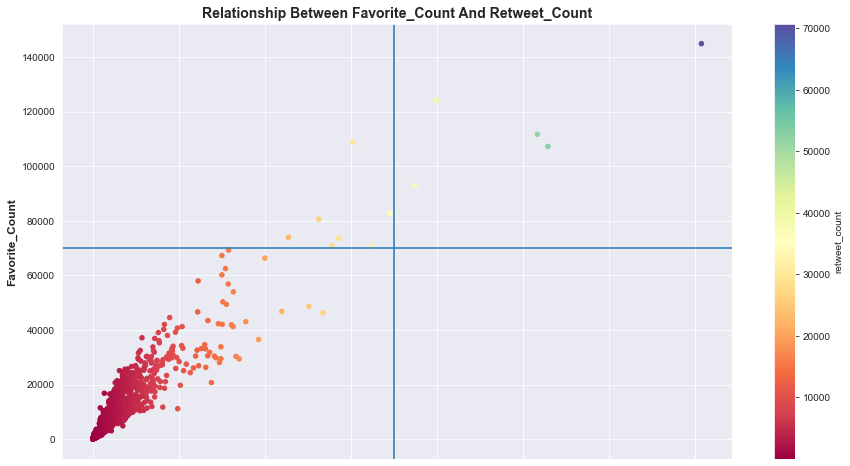

In [120]:
# Creating Scatter plot showing relationship between retweet_count and favorite count.
# call plot function
myScatterPlot(df, 'retweet_count','favorite_count')
plt.axhline(70000)
plt.axvline(35000)

> Scatterplots are good plots for comparing the relationship between variables. Assuming that liking or favoriting a tweet might influence retweet. My hypothesis was that the higher the favorite count of the tweet, the greater its retweet count. The visual above shows a strong positive relationship between the variables. For most points, as the favorite count is increasing, so does the retweet count.

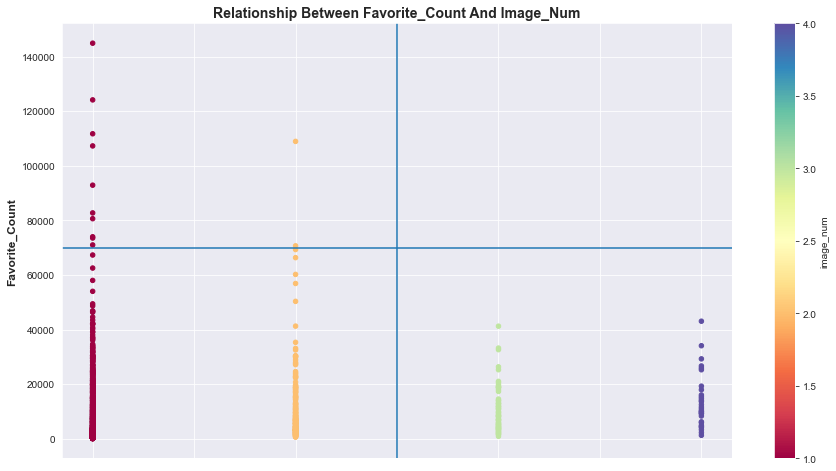

In [121]:
# Creating Scatter plot showing relationship between number of images and favorite count.
# call plot function
myScatterPlot(df, 'image_num', 'favorite_count')
plt.axhline(70000)
plt.axvline(2.5)

>There is a weak relationship between favorite count or likes and image number. The number of pictures posted of a dog does not influence the number of likes it gets.